In [1]:
from pathlib import Path
import os
import pandas as pd

import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score,v_measure_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

from nanoHUB.rfm.functions import CacheDirs, elbow_curve, display_cluster_info

nanoHUB - Serving Students, Researchers & Instructors


In [2]:
cached_dirs = CacheDirs()

In [3]:
df = pd.read_csv(
    Path(cached_dirs.cache_dir, 'rfm/by_toolevents/iteration4/unclassified_user_data.csv'),
    index_col=False
)
display(df)

,index,Unnamed: 0,user,first_start_date,last_start_date,first_finish_date,last_finish_date,job_count,superjob_count,job_event_days,superjob_event_days,last_superjob_start_date,toolevents__lifetime,start_datetime
0,19,19,061962588x,2021-04-28 01:54:30,2021-05-27 01:09:33,2021-04-28 03:31:52,2021-05-27 11:19:13,40,NaN,5,NaN,NaN,29,2021-04-28 01:54:30
1,20,20,061972018x,2021-04-28 02:17:04,2021-05-27 01:13:31,2021-04-28 02:40:49,2021-05-28 01:20:45,66,NaN,4,NaN,NaN,29,2021-04-28 02:17:04
2,26,26,0808wodlr,2020-11-10 00:04:08,2020-12-08 23:24:41,2020-11-11 00:12:54,2020-12-09 23:28:55,13,NaN,2,NaN,NaN,29,2020-11-10 00:04:08
3,92,92,12422rahulkumar,2020-09-25 04:02:01,2021-01-05 04:31:11,2020-09-26 07:49:27,2021-01-06 04:38:54,172,NaN,6,NaN,NaN,103,2020-09-25 04:02:01
4,110,110,13rahul129,2021-05-13 00:20:48,2021-06-04 12:43:29,2021-05-14 00:23:50,2021-06-04 12:58:37,125,NaN,9,NaN,NaN,22,2021-05-13 00:20:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4981,155160,155160,zy2421,2021-02-14 04:29:11,2021-02-16 09:13:55,2021-02-14 21:40:06,2021-02-24 14:01:43,372,NaN,3,NaN,NaN,10,2021-02-14 04:29:11
4982,155226,155226,zyzhu,2021-01-30 00:58:07,2021-06-16 11:26:48,2021-01-31 01:11:58,2021-06-17 11:27:52,7,NaN,2,NaN,NaN,138,2021-01-30 00:58:07
4983,155258,155258,zzhang81,2020-08-26 12:11:38,2020-09-02 12:22:57,2020-08-26 12:12:35,2020-09-03 13:50:35,193,NaN,2,NaN,NaN,8,2020-08-26 12:11:38
4984,155268,155268,zzhou436,2021-06-21 06:37:27,2021-07-25 08:57:28,2021-06-22 06:37:51,2021-07-26 10:37:37,28,NaN,8,NaN,NaN,35,2021-06-21 06:37:27


In [4]:
users = pd.DataFrame(df['user'].unique())
users.columns = ['user']

In [5]:
recency_df = df[['user', 'toolevents__lifetime']].copy()
recency_df['Recency'] = recency_df['toolevents__lifetime']

users = pd.merge(users, recency_df[['user','Recency', 'toolevents__lifetime']], on='user')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


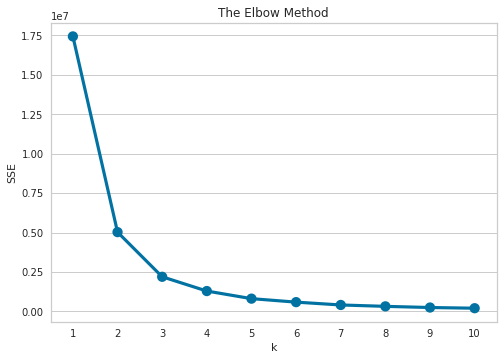

In [6]:
elbow_curve(users[['Recency']])

In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(users[['Recency']])
users['RecencyCluster'] = kmeans.predict(users[['Recency']])

In [8]:
display(users.groupby('RecencyCluster')['Recency'].describe())

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,3505.0,17.081027,13.700159,2.0,5.0,13.0,27.0,51.0
1,421.0,204.909739,46.473407,146.0,166.0,195.0,237.0,338.0
2,1060.0,85.904717,24.363151,52.0,66.0,82.0,102.0,145.0


In [9]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(users[['Recency']])
users['RecencyCluster'] = kmeans.predict(users[['Recency']])
display(users.groupby('RecencyCluster')['Recency'].describe())

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,412.0,145.733010,23.955790,108.0,125.0,145.5,165.0,193.0
1,3269.0,14.917712,11.452831,2.0,5.0,12.0,23.0,42.0
2,215.0,242.074419,34.823910,194.0,213.5,236.0,268.0,338.0
3,1090.0,70.037615,18.382165,43.0,54.0,69.0,85.0,107.0


In [10]:
users.to_csv(
    Path(cached_dirs.cache_dir, "rfm/by_toolevents/iteration4/recency-clustered.csv"),
    index=False,
    index_label=False
)

In [11]:
scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(users[['Recency']])
display(X_scaled)

array([[0.08035714],
       [0.08035714],
       [0.08035714],
       ...,
       [0.01785714],
       [0.09821429],
       [0.17261905]])

Score for number of cluster(s) 2: -44.5298252018257
Silhouette score for number of cluster(s) 2: 0.7408121767989908
Davies Bouldin score for number of cluster(s) 2: 0.4795916146572145


'Centroids - '

[[0.48925464]
 [0.07331581]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -19.42824311568851
Silhouette score for number of cluster(s) 3: 0.6845588978293684
Davies Bouldin score for number of cluster(s) 3: 0.48405848831321197


'Centroids - '

[[0.04488401]
 [0.60389803]
 [0.24971642]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -11.44926559506903
Silhouette score for number of cluster(s) 4: 0.6676020229849415
Davies Bouldin score for number of cluster(s) 4: 0.48509071749010413


'Centroids - '

[[0.43635644]
 [0.03935595]
 [0.20703837]
 [0.72200338]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 5: -7.179968137534328
Silhouette score for number of cluster(s) 5: 0.623186164621827
Davies Bouldin score for number of cluster(s) 5: 0.4969361803618623


'Centroids - '

[[0.24474529]
 [0.02262403]
 [0.72408789]
 [0.11016464]
 [0.45030416]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 6: -5.215491158607867
Silhouette score for number of cluster(s) 6: 0.6181610125102692
Davies Bouldin score for number of cluster(s) 6: 0.5118259745716451


'Centroids - '

[[0.02184111]
 [0.57019897]
 [0.23399145]
 [0.10663344]
 [0.79140787]
 [0.39263816]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 7: -3.6351451957841476
Silhouette score for number of cluster(s) 7: 0.6148393190229284
Davies Bouldin score for number of cluster(s) 7: 0.4896154942704869


'Centroids - '

[[0.28836276]
 [0.01840584]
 [0.83184524]
 [0.62878945]
 [0.08682056]
 [0.17935681]
 [0.4464952 ]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 8: -2.8585258557911155
Silhouette score for number of cluster(s) 8: 0.6160887208683027
Davies Bouldin score for number of cluster(s) 8: 0.4897548420308917


'Centroids - '

[[0.01909506]
 [0.39791154]
 [0.17598749]
 [0.51912986]
 [0.66449606]
 [0.08820722]
 [0.84825938]
 [0.27275619]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 9: -2.2025575158385853
Silhouette score for number of cluster(s) 9: 0.5884217394311294
Davies Bouldin score for number of cluster(s) 9: 0.5026137817075704


'Centroids - '

[[0.05758633]
 [0.40059256]
 [0.19380474]
 [0.51912986]
 [0.84825938]
 [0.01170838]
 [0.11680152]
 [0.2798163 ]
 [0.66449606]]
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 10: -1.833152569929315
Silhouette score for number of cluster(s) 10: 0.5832625727491071
Davies Bouldin score for number of cluster(s) 10: 0.5048204566976098


'Centroids - '

[[0.0941428 ]
 [0.42046778]
 [0.66856685]
 [0.00975602]
 [0.23341941]
 [0.85105097]
 [0.52821003]
 [0.16020796]
 [0.31492192]
 [0.04604286]]
----------------------------------------------------------------------------------------------------


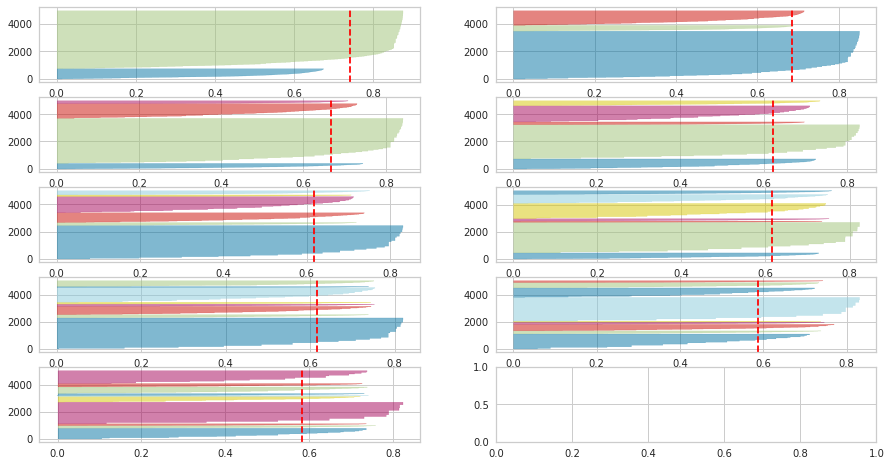

In [12]:
display_cluster_info(X_scaled)